**Инициализация библиотек**

In [29]:
import numpy as np
import matplotlib.pyplot as plt

**Начальные данные**

In [39]:
M = 3
x=0
N = 40
y=0

w = 0.5
h = 1
deltaT = 1

cp = 3.8
L = 4.42

Tm = 5
Tinf = 6

l = 4.31323
delta = 139.547327
k = 0
hi = 414.32

rows, cols = 131, 131 # m,n
Dend = np.zeros((rows,cols))
Temp = np.zeros((rows,cols))
Dend[int((rows-1)/2), int((cols-1)/2)] = 1
Temp[int((rows-1)/2), int((cols-1)/2)] = cp * (Tm - Tinf)/L

nu = (1 - (-1)) * np.random.random((rows,cols)) - 1

Grad = np.zeros((rows,cols))
S = np.zeros((rows,cols))

**Первый блок программы (*A*)**

In [31]:
def part_A():
    if y < N:
        if x < M:
            for i in range(rows):
                for j in range(cols):
                    Tij_sum = 0
                    Tij_sum_w = 0
                    
                    if i > 0:
                        Tij_sum += Temp[i-1][j]
                        if j > 0:
                            Tij_sum_w += Temp[i-1][j-1]
                    if j > 0:
                        Tij_sum += Temp[i][j-1]
                        if i < rows-1:
                            Tij_sum_w += Temp[i+1][j-1]
                    if i < rows-1:
                        Tij_sum += Temp[i+1][j]
                        if j > 0:
                            Tij_sum_w += Temp[i+1][j-1]
                    if j < cols-1:
                        Tij_sum += Temp[i][j+1]
                        if i < rows-1:
                            Tij_sum += Temp[i+1][j+1]
                        
                    Tij = (Tij_sum + w*Tij_sum_w) / (4 + 4*w)
                    Grad[i][j] = (Tij - Temp[i][j]) / ((4+4*w) * (1+2*w)*(h*h))
                    
            part_B()
        else:
            part_C()

**Второй блок программы (*B* и *C*)**

In [32]:
def part_B():
    global x
    for i in range(int((rows-1)/2), -1, -1):
        for j in range(int((cols-1)/2), -1, -1):
            if Dend[i][j] == 0:
                Temp[i][j] = Temp[i][j] + hi*deltaT*Grad[i][j] / M
    for i in range(int((rows-1)/2), rows, 1):
        for j in range(int((cols-1)/2), cols, 1):
            if Dend[i][j] == 0:
                Temp[i][j] = Temp[i][j] + hi*deltaT*Grad[i][j] / M
    x += 1
    part_A()
    
def part_C():
    global y
    for i in range(rows):
        for j in range(cols):
            sum_not_diagonal = 0
            sum_diagonal = 0
            if i > 0:
                sum_not_diagonal += Dend[i-1][j]
                if j > 0:
                    sum_diagonal += Dend[i-1][j-1]
            if j > 0:
                sum_not_diagonal += Dend[i][j-1]
                if i < rows-1:
                    sum_diagonal += Dend[i+1][j-1]
            if i < rows-1:
                sum_not_diagonal += Dend[i+1][j]
                if j > 0:
                    sum_diagonal += Dend[i+1][j-1]
            if j < cols-1:
                sum_not_diagonal += Dend[i][j+1]
                if i < rows-1:
                    sum_diagonal += Dend[i+1][j+1]
                    
            k = sum_diagonal + sum_not_diagonal
            if k >= 1:
                S[i][j] = sum_not_diagonal + w*sum_diagonal - (2.5 + 2.5*w)
                T = Temp[int((rows-1)/2), int((cols-1)/2)]*(1 + nu[i][j]*delta)+l*S[i][j]
                
                if Temp[i][j] < T:
                    Dend[i][j] = 1
                    Temp[i][j] = Temp[int((rows-1)/2), int((cols-1)/2)]
    
    y+=1

    #rgba = cmap(norm(Dend))
    #plt.pause(1e-12)
    #plt.clf()
    #plt.imshow(rgba, interpolation='nearest')
    part_A()

**Вывод результатов**

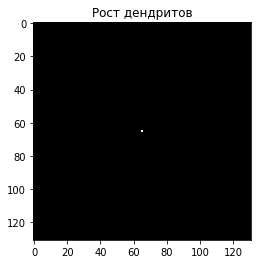

In [40]:
cmap = plt.cm.gray
norm = plt.Normalize(Dend.min(), Dend.max())
rgba = cmap(norm(Dend))

plt.title('Рост дендритов')
plt.imshow(rgba, interpolation='nearest')

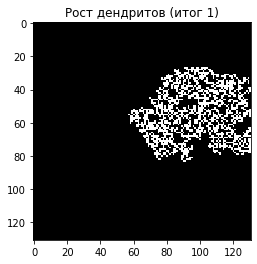

In [41]:
part_A()
rgba = cmap(norm(Dend))
title = 'Рост дендритов (итог 1)'
plt.title(title)
plt.imshow(rgba, interpolation='nearest')

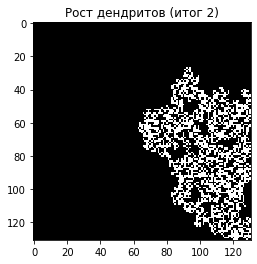

In [43]:
Dend = np.zeros((rows,cols))
Temp = np.zeros((rows,cols))
Dend[int((rows-1)/2), int((cols-1)/2)] = 1
Temp[int((rows-1)/2), int((cols-1)/2)] = cp * (Tm - Tinf)/L
x = 0
y = 0

nu = (1 - (-1)) * np.random.random((rows,cols)) - 1

Grad = np.zeros((rows,cols))
S = np.zeros((rows,cols))

part_A()
rgba = cmap(norm(Dend))
title = 'Рост дендритов (итог 2)'
plt.title(title)
plt.imshow(rgba, interpolation='nearest')

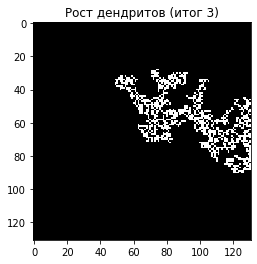

In [44]:
Dend = np.zeros((rows,cols))
Temp = np.zeros((rows,cols))
Dend[int((rows-1)/2), int((cols-1)/2)] = 1
Temp[int((rows-1)/2), int((cols-1)/2)] = cp * (Tm - Tinf)/L
x = 0
y = 0

nu = (1 - (-1)) * np.random.random((rows,cols)) - 1

Grad = np.zeros((rows,cols))
S = np.zeros((rows,cols))

part_A()
rgba = cmap(norm(Dend))
title = 'Рост дендритов (итог 3)'
plt.title(title)
plt.imshow(rgba, interpolation='nearest')

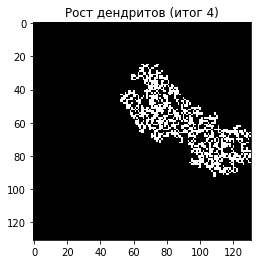

In [45]:
Dend = np.zeros((rows,cols))
Temp = np.zeros((rows,cols))
Dend[int((rows-1)/2), int((cols-1)/2)] = 1
Temp[int((rows-1)/2), int((cols-1)/2)] = cp * (Tm - Tinf)/L
x = 0
y = 0

nu = (1 - (-1)) * np.random.random((rows,cols)) - 1

Grad = np.zeros((rows,cols))
S = np.zeros((rows,cols))

part_A()
rgba = cmap(norm(Dend))
title = 'Рост дендритов (итог 4)'
plt.title(title)
plt.imshow(rgba, interpolation='nearest')

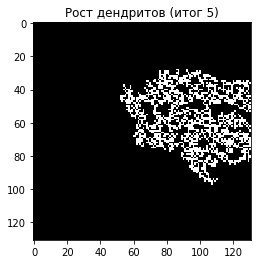

In [46]:
Dend = np.zeros((rows,cols))
Temp = np.zeros((rows,cols))
Dend[int((rows-1)/2), int((cols-1)/2)] = 1
Temp[int((rows-1)/2), int((cols-1)/2)] = cp * (Tm - Tinf)/L
x = 0
y = 0

nu = (1 - (-1)) * np.random.random((rows,cols)) - 1

Grad = np.zeros((rows,cols))
S = np.zeros((rows,cols))

part_A()
rgba = cmap(norm(Dend))
title = 'Рост дендритов (итог 5)'
plt.title(title)
plt.imshow(rgba, interpolation='nearest')

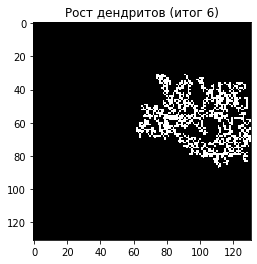

In [47]:
Dend = np.zeros((rows,cols))
Temp = np.zeros((rows,cols))
Dend[int((rows-1)/2), int((cols-1)/2)] = 1
Temp[int((rows-1)/2), int((cols-1)/2)] = cp * (Tm - Tinf)/L
x = 0
y = 0

nu = (1 - (-1)) * np.random.random((rows,cols)) - 1

Grad = np.zeros((rows,cols))
S = np.zeros((rows,cols))

part_A()
rgba = cmap(norm(Dend))
title = 'Рост дендритов (итог 6)'
plt.title(title)
plt.imshow(rgba, interpolation='nearest')

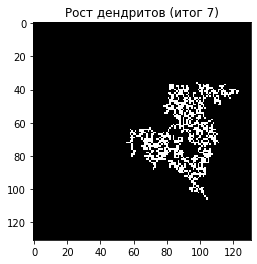

In [48]:
Dend = np.zeros((rows,cols))
Temp = np.zeros((rows,cols))
Dend[int((rows-1)/2), int((cols-1)/2)] = 1
Temp[int((rows-1)/2), int((cols-1)/2)] = cp * (Tm - Tinf)/L
x = 0
y = 0

nu = (1 - (-1)) * np.random.random((rows,cols)) - 1

Grad = np.zeros((rows,cols))
S = np.zeros((rows,cols))

part_A()
rgba = cmap(norm(Dend))
title = 'Рост дендритов (итог 7)'
plt.title(title)
plt.imshow(rgba, interpolation='nearest')

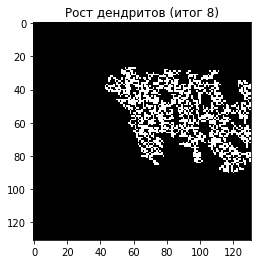

In [49]:
Dend = np.zeros((rows,cols))
Temp = np.zeros((rows,cols))
Dend[int((rows-1)/2), int((cols-1)/2)] = 1
Temp[int((rows-1)/2), int((cols-1)/2)] = cp * (Tm - Tinf)/L
x = 0
y = 0

nu = (1 - (-1)) * np.random.random((rows,cols)) - 1

Grad = np.zeros((rows,cols))
S = np.zeros((rows,cols))

part_A()
rgba = cmap(norm(Dend))
title = 'Рост дендритов (итог 8)'
plt.title(title)
plt.imshow(rgba, interpolation='nearest')

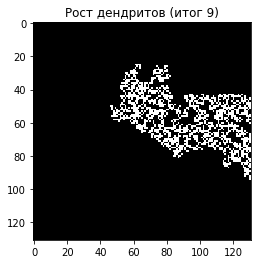

In [50]:
Dend = np.zeros((rows,cols))
Temp = np.zeros((rows,cols))
Dend[int((rows-1)/2), int((cols-1)/2)] = 1
Temp[int((rows-1)/2), int((cols-1)/2)] = cp * (Tm - Tinf)/L
x = 0
y = 0

nu = (1 - (-1)) * np.random.random((rows,cols)) - 1

Grad = np.zeros((rows,cols))
S = np.zeros((rows,cols))

part_A()
rgba = cmap(norm(Dend))
title = 'Рост дендритов (итог 9)'
plt.title(title)
plt.imshow(rgba, interpolation='nearest')